In [1]:
import numpy as np
import matplotlib.pyplot as plt
%run dnn_utils.ipynb
%run testCases.ipynb
import scipy
from PIL import Image
from scipy import ndimage
import h5py

In [31]:
def initialize_parameters_deep(layer_dims):

    np.random.seed(1)
    parameters = {} # it is a dictionary with ['W+str(l)'],['b+str(l)'] as keys and the randomly generated metrices as their values
    L = len(layer_dims)
#     print("initialised parameters:")
    for l in range(1, L):
        
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
       # print('W' + str(l)+":"+str(parameters['W' + str(l)]))
#         print('W' + str(l)+"shape :"+str((parameters['W' + str(l)]).shape))
#         print('W' + str(l)+" :"+str(parameters['W' + str(l)]))
#         print('b' + str(l)+"shape :"+str((parameters['b' + str(l)]).shape))
#         print('W' + str(l)+" :"+str(parameters['W' + str(l)]))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l],layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
        
        
       
        
    return parameters

In [21]:
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-4.16757847e-03 -5.62668272e-04 -2.13619610e-02  1.64027081e-02
  -1.79343559e-02]
 [-8.41747366e-03  5.02881417e-03 -1.24528809e-02 -1.05795222e-02
  -9.09007615e-03]
 [ 5.51454045e-03  2.29220801e-02  4.15393930e-04 -1.11792545e-02
   5.39058321e-03]
 [-5.96159700e-03 -1.91304965e-04  1.17500122e-02 -7.47870949e-03
   9.02525097e-05]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.00878108 -0.00156434  0.0025657  -0.00988779]
 [-0.00338822 -0.00236184 -0.00637655 -0.01187612]
 [-0.01421217 -0.00153495 -0.00269057  0.02231367]]
b2 = [[0.]
 [0.]
 [0.]]


In [4]:
def initialize_parameters(n_x, n_h, n_y):
    
    np.random.seed(1)
    
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
#     print("W1 shape :"+str(W1.shape))
#     print("W1 :"+str(W1))
#     print("b1 shape :"+str(b1.shape))
#     print("b1 :"+str(b1))
#     print("W2 shape :"+str(W2.shape))
#     print("W2 :"+str(W2))
#     print("b2 shape :"+str(b2.shape))
#     print("b2 :"+str(b2))
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters =  { "W1": W1,
                    "b1": b1,
                    "W2": W2,
                    "b2": b2 }
    
    return parameters

In [5]:
layers_dims = (12288, 5, 1) #12288, 20, 7, 5, 1
    
parameters =initialize_parameters(3,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[0.]]


In [6]:
def linear_forward(A, W, b):
    
#     print("W shape"+str(W.shape))
#     print("Ashape"+str(A.shape))
#     print("b shape"+str(b.shape))
    Z = np.dot(W,A)+b
#     print("Z shape:"+str(Z.shape))
#     print("Z="+str()+": "+str(Z))
        
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [7]:
A, W, b = linear_forward_test_case()

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[2.1980455  1.14236511]]


In [8]:
def linear_activation_forward(A_prev, W, b, activation):
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)  # Z
        A, activation_cache = sigmoid(Z)                # a
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)
    
    return A, cache

In [9]:
A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.00215175 0.945712  ]]
With ReLU: A = [[0.         2.85763489]]


In [10]:
def compute_cost(Al, Y):
    
    m = Y.shape[1]
    
    cost = -(np.dot(Y,np.log(Al.T))+np.dot(1-Y,np.log(1-Al).T))/m
    
    
    cost = np.squeeze(cost)
    
    assert(cost.shape == ())
    
    return cost

In [11]:
def linear_backward(dZ, cache):
    
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = np.dot(dZ,A_prev.T)/m
    db = np.sum(dZ,axis=1,keepdims=True)/m
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [12]:
def linear_activation_backward(dA, cache, activation):
    
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
#         print("dZ: "+str(dZ))
#         print("dA_prev: "+str(dA_prev))
#         print("dW: "+str(dW))
#         print("db: "+str(db))
        
    elif activation == "sigmoid":
        
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
#         print("dZ: "+str(dZ))
        
#         print("dA_prev: "+str(dA_prev))
#         print("dW: "+str(dW))
#         print("db: "+str(db))
    
    return dA_prev, dW, db

In [13]:
def update_parameters(parameters, grads, alpha):
    
    L = len(parameters) // 2

    
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - alpha * grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - alpha * grads["db" + str(l + 1)]
#         print("W"+str(l+1)+": "+str(parameters["W" + str(l+1)]))
#         print("b"+str(l+1)+": "+str(parameters["b" + str(l+1)]))
        
#     print("W4:"+str(parameters["W4"]))
#     print("b4:"+str(parameters["b4"]))
    
    return parameters

In [14]:
def load_data():
    with h5py.File('train_catvnoncat.h5', "r") as train_dataset:
        train_set_x_orig = np.array(train_dataset["train_set_x"][:])
        train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    with h5py.File('test_catvnoncat.h5', "r") as test_dataset:
        test_set_x_orig = np.array(test_dataset["test_set_x"][:])
        test_set_y_orig = np.array(test_dataset["test_set_y"][:])
        classes = np.array(test_dataset["list_classes"][:])

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [15]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

In [16]:
train_x_vec = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_vec = test_x_orig.reshape(test_x_orig.shape[0], -1).T

In [17]:
#flattenting the inputs to a column vector "X"

train_X = train_x_vec/255
test_X = test_x_vec/255

In [18]:
def four_layer_model(X, Y, layers_dims, alpha = 0.0075, num_iterations = 500, print_cost=False):
    
    # alpha = 0.112
    
    np.random.seed(1)
    grads = {}
    costs = []
    m = X.shape[1] 
    layers_dims = [12288, 7, 5, 1] #12288, 20, 7, 5, 1
    
    parameters =initialize_parameters_deep(layers_dims)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
#     W4 = parameters["W4"]
#     b4 = parameters["b4"]
    
    for i in range(0, num_iterations):
        
        #Forward Propagation
        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
#         print("A1:"+str(A1))
        A2, cache2 = linear_activation_forward(A1, W2, b2, "relu")
#         print("A2:"+str(A2))
        A3, cache3 = linear_activation_forward(A2, W3, b3, "sigmoid") 
#         print("A3:"+str(A3))
        ########
#         A4, cache4 = linear_activation_forward(A3, W4, b4, "sigmoid")
#         print("A4:"+str(A4))
        cost = compute_cost(A4, Y)
        print("Cost for {}th iteration: {}".format(i,cost))
        
        #Backward Propagation
        dA4 = - (np.divide(Y, A4) - np.divide(1 - Y, 1 - A4))
        
        dA3, dW4, db4 = linear_activation_backward(dA4, cache4,"sigmoid")
        dA2, dW3, db3 = linear_activation_backward(dA3, cache3, "relu")
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "relu")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")
        
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        grads['dW3'] = dW3
        grads['db3'] = db3
        grads['dW4'] = dW4
        grads['db4'] = db4
        
        parameters = update_parameters(parameters, grads,alpha)
        
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        W3 = parameters["W3"]
        b3 = parameters["b3"]
        W4 = parameters["W4"]
        b4 = parameters["b4"]
        
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i,np.squeeze(cost)))
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(alpha))
    plt.show()
        
    return parameters
            

Cost for 0th iteration: 0.6931449677964331
Cost after iteration 0: 0.6931449677964331
Cost for 1th iteration: 0.6929530380033049
Cost for 2th iteration: 0.6927618276457673
Cost for 3th iteration: 0.6925713340257849
Cost for 4th iteration: 0.6923815544549393
Cost for 5th iteration: 0.6921924862179367
Cost for 6th iteration: 0.6920041248964901
Cost for 7th iteration: 0.6918164692356897
Cost for 8th iteration: 0.691629517330349
Cost for 9th iteration: 0.6914432661726171
Cost for 10th iteration: 0.6912577131312071
Cost for 11th iteration: 0.6910728559962371
Cost for 12th iteration: 0.6908886932183629
Cost for 13th iteration: 0.6907052222749368
Cost for 14th iteration: 0.690522439004105
Cost for 15th iteration: 0.6903403412693216
Cost for 16th iteration: 0.6901589270412188
Cost for 17th iteration: 0.6899781935503662
Cost for 18th iteration: 0.6897981381910185
Cost for 19th iteration: 0.6896187581645326
Cost for 20th iteration: 0.6894400512700816
Cost for 21th iteration: 0.689262013829477
Co

Cost for 190th iteration: 0.667015039207625
Cost for 191th iteration: 0.6669207901557018
Cost for 192th iteration: 0.6668268911136448
Cost for 193th iteration: 0.6667333407535011
Cost for 194th iteration: 0.6666401377523937
Cost for 195th iteration: 0.6665472807925004
Cost for 196th iteration: 0.6664547685610372
Cost for 197th iteration: 0.6663625997502396
Cost for 198th iteration: 0.6662707730573422
Cost for 199th iteration: 0.6661792871849218
Cost for 200th iteration: 0.6660881408426185
Cost after iteration 200: 0.6660881408426185
Cost for 201th iteration: 0.6659973327365526
Cost for 202th iteration: 0.6659068615869619
Cost for 203th iteration: 0.665816726115807
Cost for 204th iteration: 0.6657269250499389
Cost for 205th iteration: 0.665637457121081
Cost for 206th iteration: 0.6655483210658102
Cost for 207th iteration: 0.6654595156255403
Cost for 208th iteration: 0.6653710395465023
Cost for 209th iteration: 0.6652828915797282
Cost for 210th iteration: 0.6651950704810322
Cost for 211t

Cost for 384th iteration: 0.6539456707702769
Cost for 385th iteration: 0.6538995935567461
Cost for 386th iteration: 0.6538536844531242
Cost for 387th iteration: 0.6538079428327568
Cost for 388th iteration: 0.6537623680632094
Cost for 389th iteration: 0.6537169595227342
Cost for 390th iteration: 0.6536717165892063
Cost for 391th iteration: 0.6536266386428875
Cost for 392th iteration: 0.6535817250664191
Cost for 393th iteration: 0.6535369752448108
Cost for 394th iteration: 0.6534923885654331
Cost for 395th iteration: 0.6534479644180066
Cost for 396th iteration: 0.6534037021945938
Cost for 397th iteration: 0.6533596012895899
Cost for 398th iteration: 0.6533156610997132
Cost for 399th iteration: 0.6532718810239967
Cost for 400th iteration: 0.6532282604638503
Cost after iteration 400: 0.6532282604638503
Cost for 401th iteration: 0.6531847988254657
Cost for 402th iteration: 0.6531414955094322
Cost for 403th iteration: 0.6530983499266546
Cost for 404th iteration: 0.6530553614876028
Cost for 4

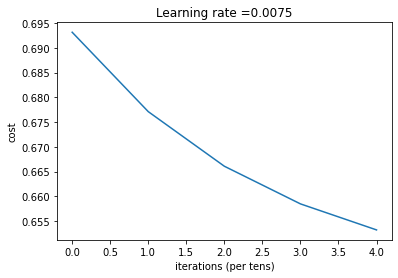

In [33]:
layers_dims = [ 1]
parameters = four_layer_model(test_X, test_y, layers_dims,num_iterations = 500, print_cost = True)